In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 87s 222ms/step - loss: 0.6001 - accuracy: 0.6711 - val_loss: 0.6921 - val_accuracy: 0.5926
Epoch 2/10
391/391 [==============================] - 86s 220ms/step - loss: 0.5196 - accuracy: 0.7491 - val_loss: 0.4999 - val_accuracy: 0.7684
Epoch 3/10
391/391 [==============================] - 86s 220ms/step - loss: 0.3439 - accuracy: 0.8580 - val_loss: 0.3645 - val_accuracy: 0.8538
Epoch 4/10
391/391 [==============================] - 86s 219ms/step - loss: 0.2424 - accuracy: 0.9072 - val_loss: 0.3439 - val_accuracy: 0.8638
Epoch 5/10
391/391 [==============================] - 85s 219ms/step - loss: 0.1868 - accuracy: 0.9326 - val_loss: 0.3175 - val_accuracy: 0.8732
Epoch 6/10
391/391 [==============================] - 85s 216ms/step - loss: 0.1409 - accuracy: 0.9520 - val_loss: 0.3478 - val_accuracy: 0.8691
Epoch 7/10
391/391 [==============================] - 86s 219ms/step - loss: 0.1014 - accuracy: 0.9672 - val_loss: 0.3952 - val_ac

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

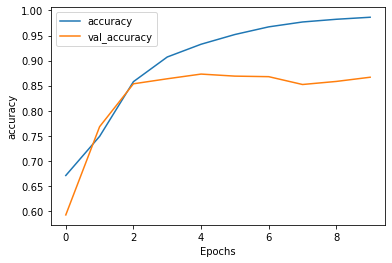

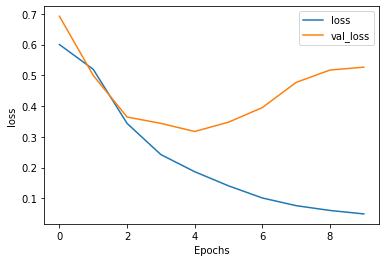

In [9]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# overfitting

In [10]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    
out_v.close()
out_m.close()

(8185, 64)
